In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [2]:
iris = load_iris()

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
#Should I perform scaling while implementing decision tree?

In [5]:
X_train, X_test,y_train, y_test = train_test_split(iris.data,iris.target,test_size=0.30)

In [6]:
model = DecisionTreeClassifier()


In [7]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import accuracy_score

In [10]:
accuracy_score(y_test,y_pred)

0.9111111111111111

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
param_grid = {
'max_depth':[3,4,5,6],
'min_samples_split':[2,3,4,5],
'min_samples_leaf':[1,2,3]
}

In [13]:
grid_search = GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [14]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [15]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_split=3)

In [16]:
grid_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [17]:
model2 = DecisionTreeClassifier(max_depth=6,min_samples_leaf=1,min_samples_split=2)

In [18]:
model2.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6)

In [19]:
y_pred = model2.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.9111111111111111

[Text(0.4, 0.9, 'X[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.5, 0.7, 'X[2] <= 4.85\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.2, 0.5, 'X[3] <= 1.7\ngini = 0.054\nsamples = 36\nvalue = [0, 35, 1]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'),
 Text(0.3, 0.3, 'X[0] <= 6.05\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.5, 'X[3] <= 1.75\ngini = 0.1\nsamples = 38\nvalue = [0, 2, 36]'),
 Text(0.7, 0.3, 'X[2] <= 5.05\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

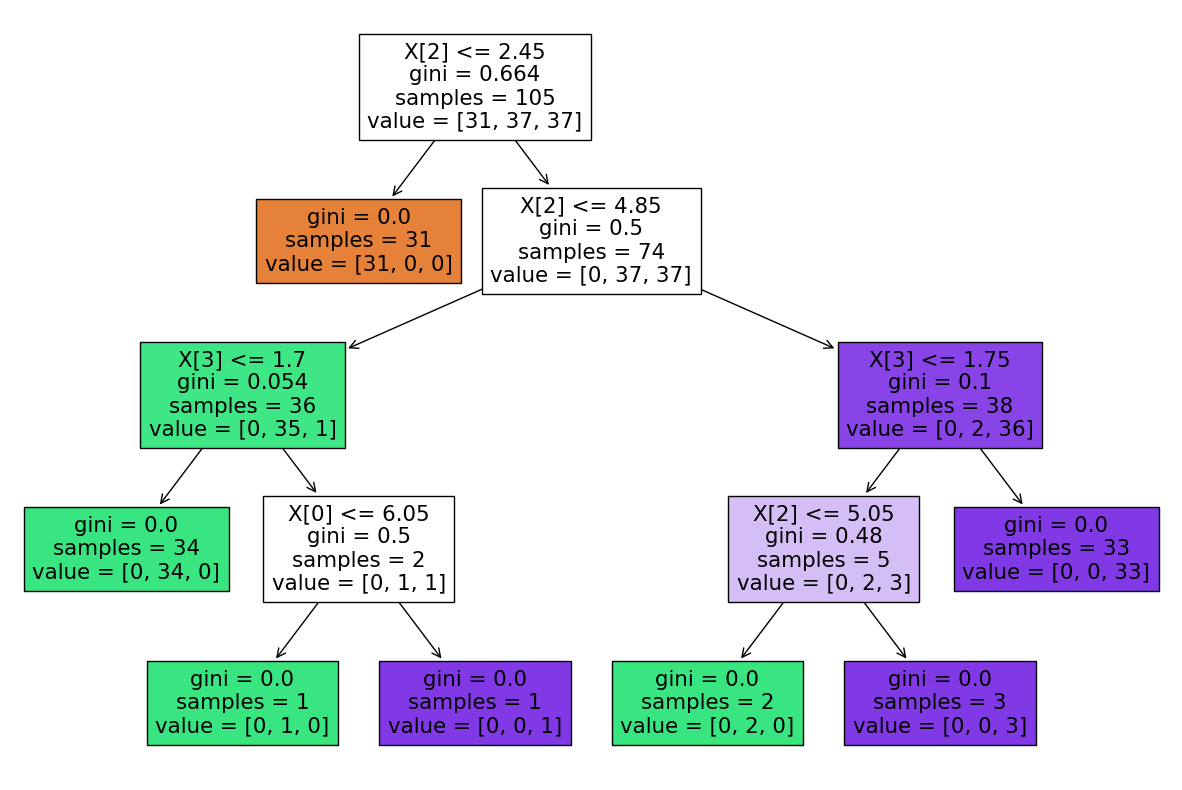

In [21]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(model2,filled=True)